In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv("Patient_Dataset.csv")

In [3]:
# shape
print(df.shape)

(91713, 186)


In [4]:
# types
set_option('display.max_rows', 500)
print(df.dtypes)

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [5]:
# head
set_option('display.width', 100)
print(df.head(20))

    encounter_id  patient_id  hospital_id  hospital_death   age        bmi  elective_surgery  \
0          66154       25312          118               0  68.0  22.730000                 0   
1         114252       59342           81               0  77.0  27.420000                 0   
2         119783       50777          118               0  25.0  31.950000                 0   
3          79267       46918          118               0  81.0  22.640000                 1   
4          92056       34377           33               0  19.0        NaN                 0   
5          33181       74489           83               0  67.0  27.560000                 0   
6          82208       49526           83               0  59.0  57.450000                 0   
7         120995       50129           33               0  70.0        NaN                 0   
8          80471       10577          118               1  45.0        NaN                 0   
9          42871       90749          11

In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(df.describe())

       encounter_id  patient_id  hospital_id  hospital_death        age        bmi  \
count     91713.000   91713.000    91713.000       91713.000  87485.000  88284.000   
mean      65606.079   65537.131      105.669           0.086     62.310     29.186   
std       37795.089   37811.252       62.854           0.281     16.775      8.275   
min           1.000       1.000        2.000           0.000     16.000     14.845   
25%       32852.000   32830.000       47.000           0.000     52.000     23.642   
50%       65665.000   65413.000      109.000           0.000     65.000     27.655   
75%       98342.000   98298.000      161.000           0.000     75.000     32.930   
max      131051.000  131051.000      204.000           1.000     89.000     67.815   

       elective_surgery     height     icu_id  pre_icu_los_days  ...  \
count         91713.000  90379.000  91713.000         91713.000  ...   
mean              0.184    169.642    508.358             0.836  ...   
std      

In [7]:
# class distribution
print(df.groupby('hospital_death').size())

hospital_death
0    83798
1     7915
dtype: int64


C:\Users\Revi\AppData\Local\Temp/ipykernel_13780/491936433.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(sharex=False, sharey=False,ax=ax)


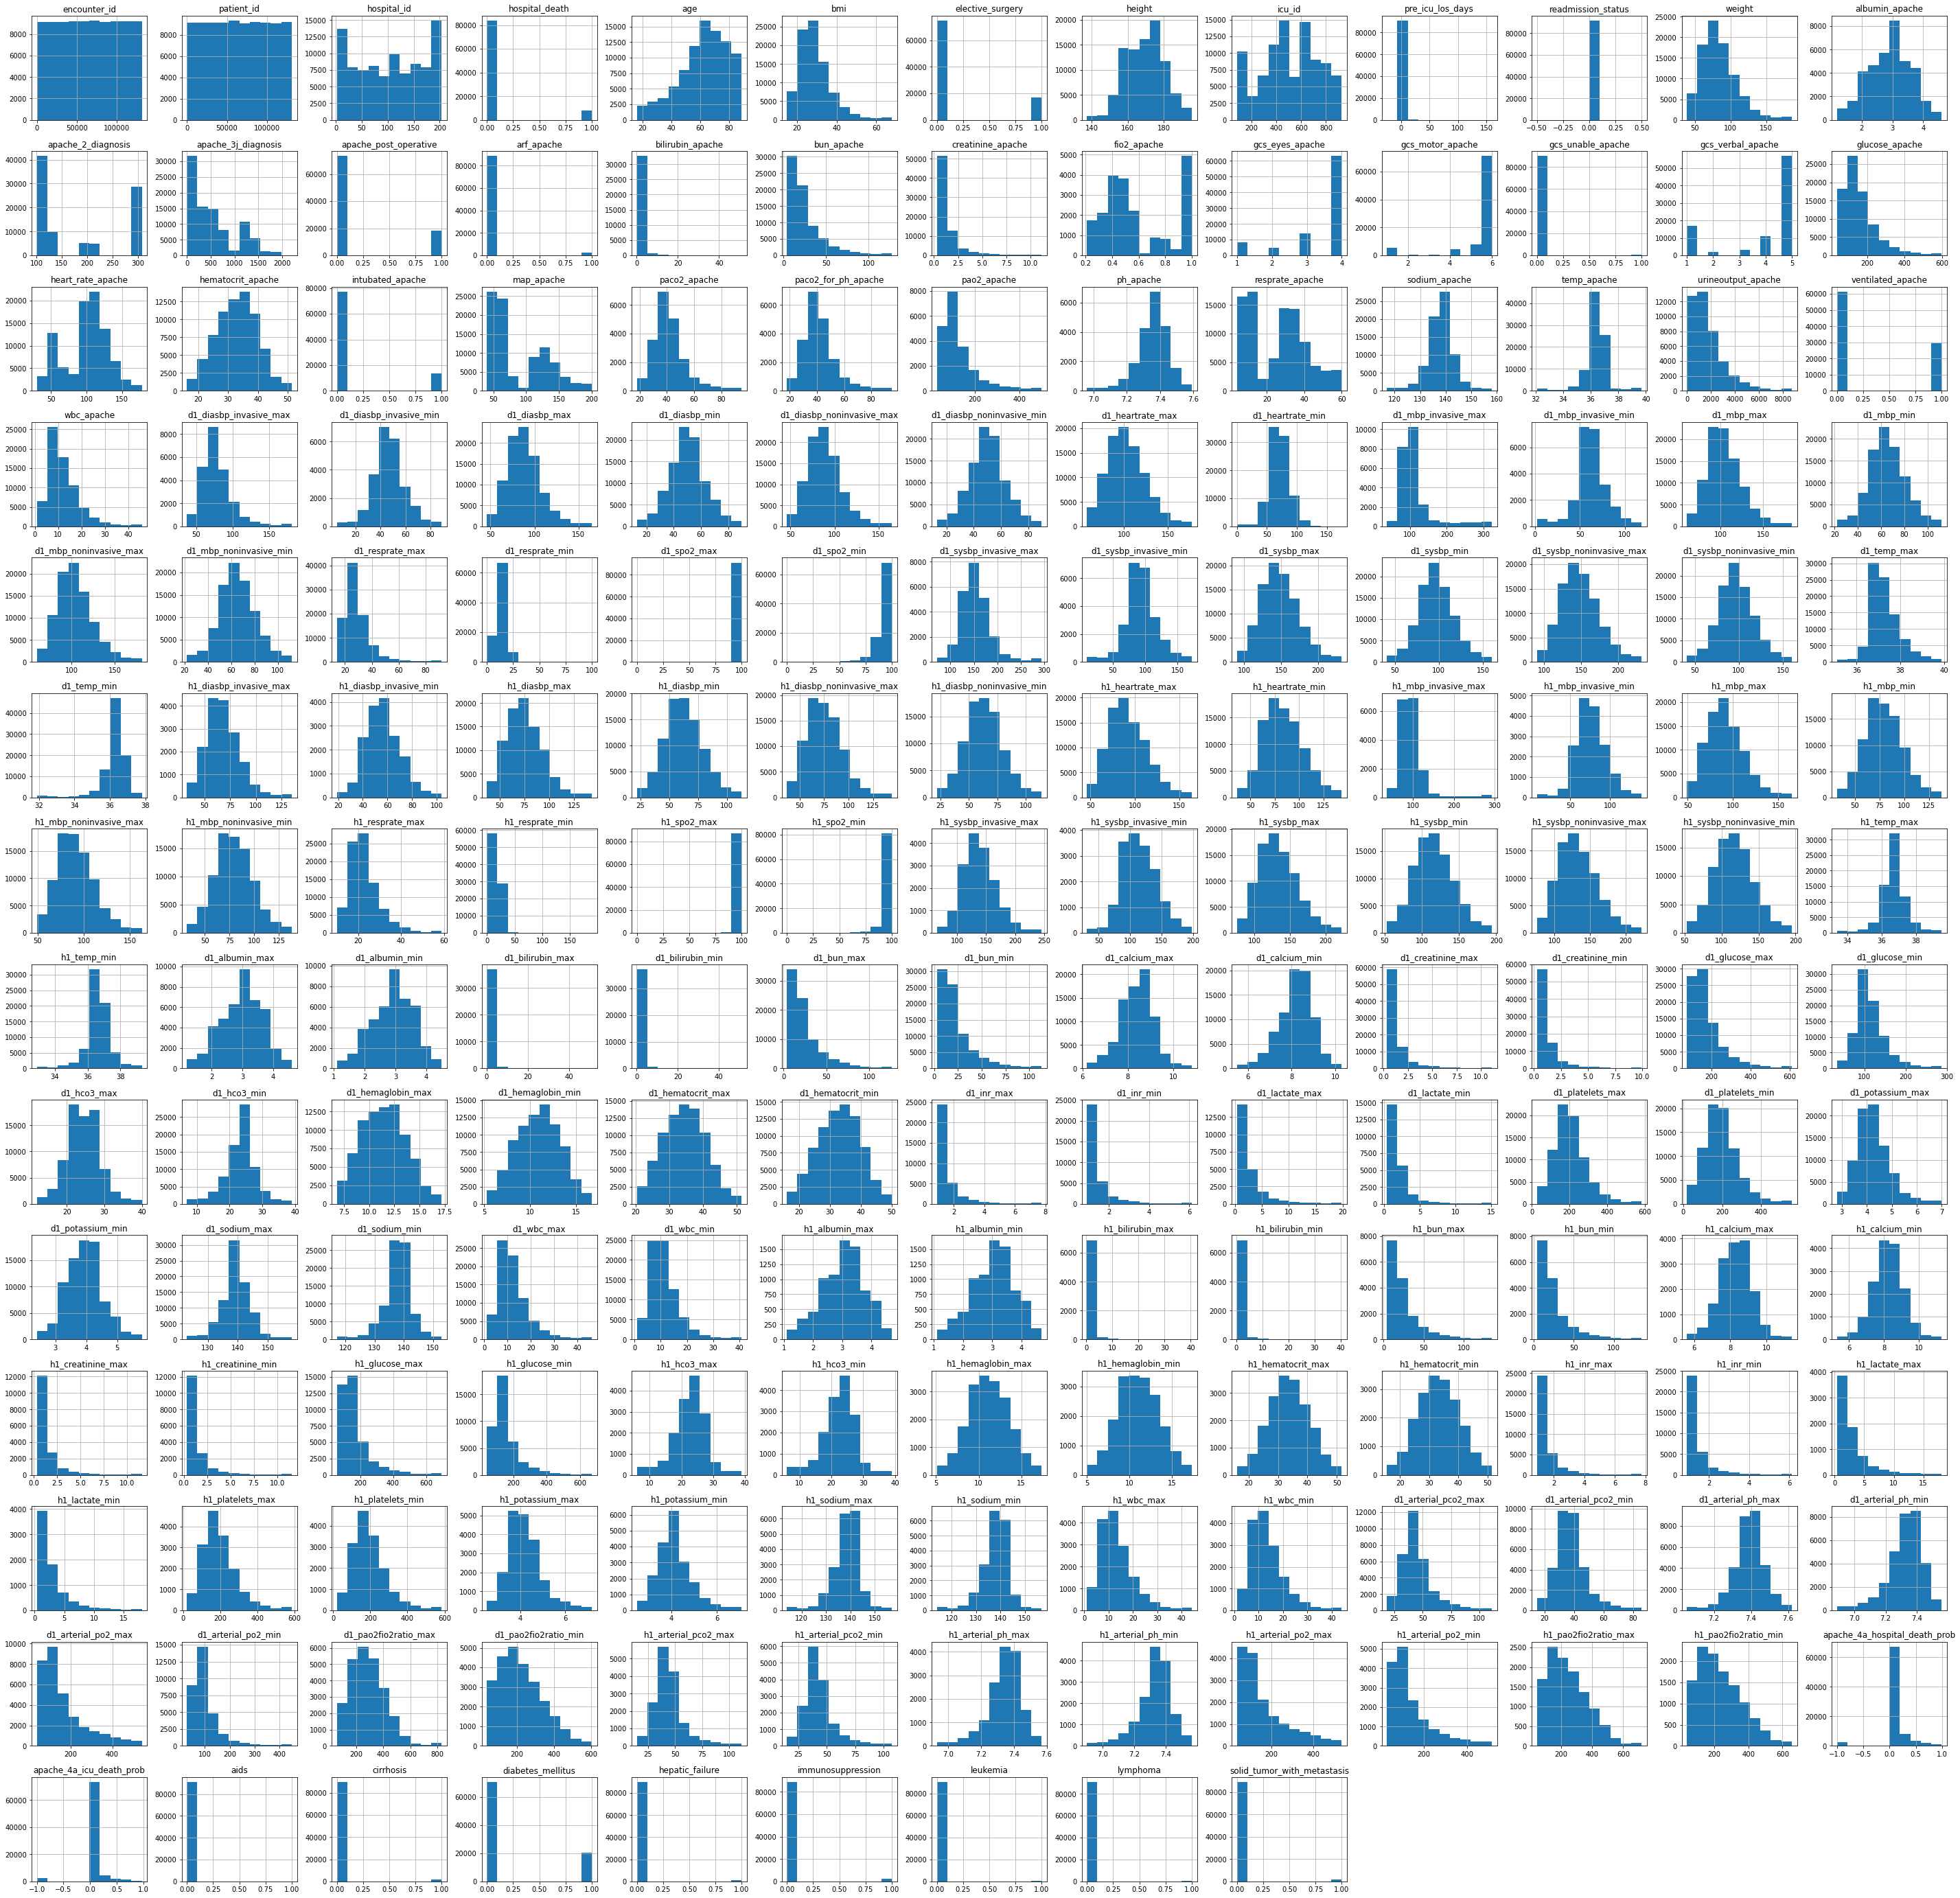

In [8]:
# histograms
fig = plt.figure(figsize = (50,50))
ax = fig.gca()
df.hist(sharex=False, sharey=False,ax=ax)
plt.show()

In [52]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
       'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=112)

LinAlgError: singular matrix

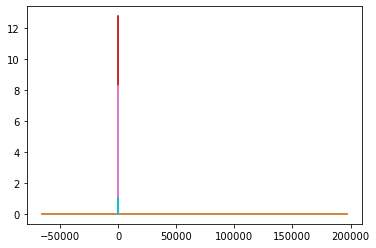

In [10]:
# density
#df.plot(kind='density', subplots=True, layout=(15,15), sharex=False, legend=False,#
#fontsize=1)
#df.plot.kde()
#plt.show()

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


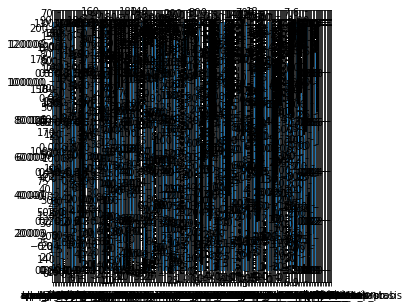

In [20]:
# box and whisker plots
#fig = plt.figure(figsize = (5,5))
#ax = fig.gca()
#df.plot(kind='box', subplots=True, sharex=False, sharey=False,ax=ax)
#plt.show()

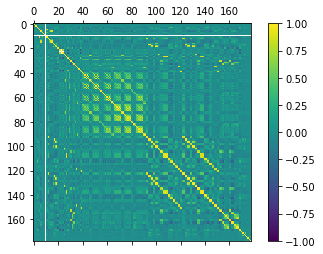

In [21]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [22]:
df_copy = df.copy()

In [23]:
cols_to_remove = []
for col in df.columns:
    a = df[col].isnull().sum()
    b = len(df[col])
    tmp =  (a/b) * 100
    if (tmp > 50):
        cols_to_remove.append(col)
cols_to_remove

['albumin_apache',
 'bilirubin_apache',
 'fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_m

In [24]:
df.drop(cols_to_remove,axis=1,inplace=True)

In [25]:
df.shape

(91713, 112)

In [28]:
df_sample = df.iloc[0:20,:]

In [29]:
df_sample

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.560,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.710,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [30]:
df_sample.drop(["encounter_id","patient_id","hospital_id"],axis=1,inplace=True)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_sample

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,0,67.0,27.560,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,0,59.0,57.450,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,0,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,0,50.0,25.710,0,NaN,M,175.3,Direct Admit,Accident & Emergency,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [32]:
cols_to_remove = []
for col in df_sample.columns:
    if (df[col] == 0).all():
        cols_to_remove.append(col)
cols_to_remove

['readmission_status']

In [33]:
df_sample.drop(cols_to_remove,axis=1,inplace=True)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df_sample

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,0,67.0,27.560,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,0,59.0,57.450,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,0,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,0,50.0,25.710,0,NaN,M,175.3,Direct Admit,Accident & Emergency,114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [36]:
df_sample.head().T

,0,1,2,3,4
hospital_death,0,0,0,0,0
age,68.0,77.0,25.0,81.0,19.0
bmi,22.73,27.42,31.95,22.64,NaN
elective_surgery,0,0,0,1,0
ethnicity,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,M,F,F,F,M
height,180.3,160.0,172.7,165.1,188.0
hospital_admit_source,Floor,Floor,Emergency Department,Operating Room,NaN
icu_admit_source,Floor,Floor,Accident & Emergency,Operating Room / Recovery,Accident & Emergency
icu_id,92,90,93,92,91


In [37]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_death,20.0,0.050,0.224,0.00,0.000e+00,0.000,0.000,1.000
age,20.0,58.250,19.404,19.00,4.575e+01,65.000,73.250,81.000
bmi,14.0,30.281,9.131,22.64,2.574e+01,27.490,31.065,57.450
elective_surgery,20.0,0.300,0.470,0.00,0.000e+00,0.000,1.000,1.000
height,20.0,171.690,10.447,154.90,1.651e+02,171.450,175.925,193.000
icu_id,20.0,96.900,7.887,90.00,9.200e+01,94.000,97.750,114.000
pre_icu_los_days,20.0,0.537,1.186,0.00,6.944e-04,0.015,0.638,5.164
weight,14.0,88.929,25.907,61.70,7.080e+01,79.400,98.825,156.600
apache_2_diagnosis,20.0,193.550,88.286,108.00,1.130e+02,162.500,301.000,304.000
apache_3j_diagnosis,20.0,644.228,487.348,103.01,2.030e+02,501.530,1206.030,1505.020


In [38]:
cols_to_remove = []
for col in df.columns:
    if (df[col] == 0).all():
        cols_to_remove.append(col)
cols_to_remove

['readmission_status']

In [40]:
df['solid_tumor_with_metastasis']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91708    1.0
91709    0.0
91710    0.0
91711    0.0
91712    0.0
Name: solid_tumor_with_metastasis, Length: 91713, dtype: float64

In [41]:
df.duplicated().sum()

0

In [42]:
df_sample.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [46]:
set_option('display.width', 100)
print(df_sample.head(20))

    hospital_death   age     bmi  elective_surgery  ethnicity gender  height  \
0                0  68.0  22.730                 0  Caucasian      M   180.3   
1                0  77.0  27.420                 0  Caucasian      F   160.0   
2                0  25.0  31.950                 0  Caucasian      F   172.7   
3                0  81.0  22.640                 1  Caucasian      F   165.1   
4                0  19.0     NaN                 0  Caucasian      M   188.0   
5                0  67.0  27.560                 0  Caucasian      M   190.5   
6                0  59.0  57.450                 0  Caucasian      F   165.1   
7                0  70.0     NaN                 0  Caucasian      M   165.0   
8                1  45.0     NaN                 0  Caucasian      M   170.2   
9                0  50.0  25.710                 0        NaN      M   175.3   
10               0  72.0  28.257                 1   Hispanic      F   154.9   
11               0  80.0  27.383        

In [47]:
df_sample.drop(["icu_id"],axis=1,inplace=True)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
df_sample

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730,0,Caucasian,M,180.3,Floor,Floor,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420,0,Caucasian,F,160.0,Floor,Floor,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,0,67.0,27.560,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,0,59.0,57.450,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,0,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,admit,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,0,50.0,25.710,0,NaN,M,175.3,Direct Admit,Accident & Emergency,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [49]:
correlations = df.corr(method='pearson')
print(correlations)

                               encounter_id  patient_id  hospital_id  hospital_death    age  \
encounter_id                      1.000e+00  -9.575e-03   -4.532e-03      -5.243e-03 -0.004   
patient_id                       -9.575e-03   1.000e+00   -7.075e-03       4.877e-03  0.006   
hospital_id                      -4.532e-03  -7.075e-03    1.000e+00      -1.255e-03 -0.009   
hospital_death                   -5.243e-03   4.877e-03   -1.255e-03       1.000e+00  0.111   
age                              -3.990e-03   6.343e-03   -8.673e-03       1.110e-01  1.000   
bmi                              -1.068e-03  -1.380e-03    1.287e-02      -3.125e-02 -0.087   
elective_surgery                  2.036e-03   1.387e-03    5.212e-02      -9.357e-02  0.067   
height                           -5.400e-03   2.902e-03    2.789e-02      -1.953e-02 -0.110   
icu_id                           -9.925e-04  -1.770e-03    4.526e-03       9.943e-04 -0.024   
pre_icu_los_days                 -5.704e-04  -4.41

C:\Users\Revi\AppData\Local\Temp/ipykernel_13780/3807676626.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(sharex=False, sharey=False,ax=ax)


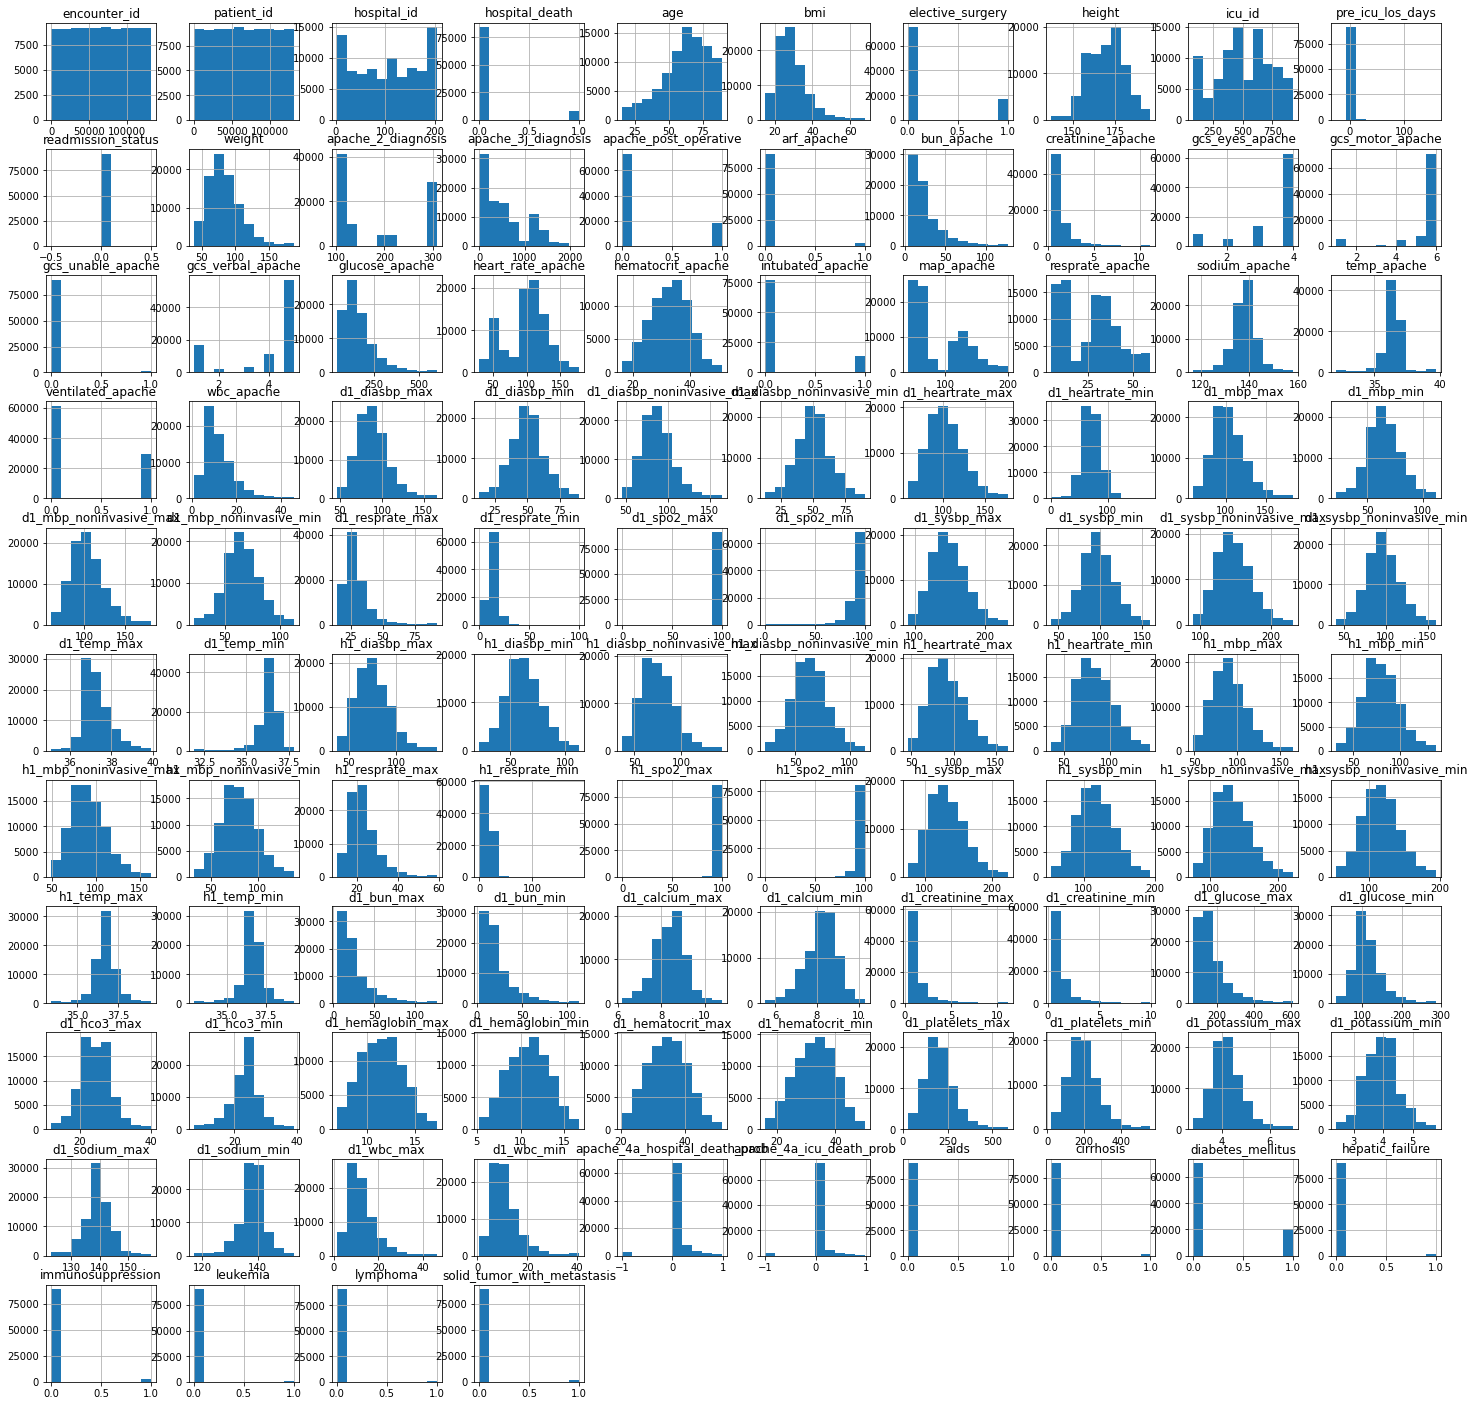

In [55]:
# histograms
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
df.hist(sharex=False, sharey=False,ax=ax)
plt.show()

In [57]:
df.drop(["encounter_id","patient_id","hospital_id","readmission_status","icu_id","pre_icu_los_days","arf_apache","gcs_unable_apache","aids","cirrhosis","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis"],axis=1,inplace=True)

C:\Users\Revi\AppData\Local\Temp/ipykernel_13780/3807676626.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(sharex=False, sharey=False,ax=ax)


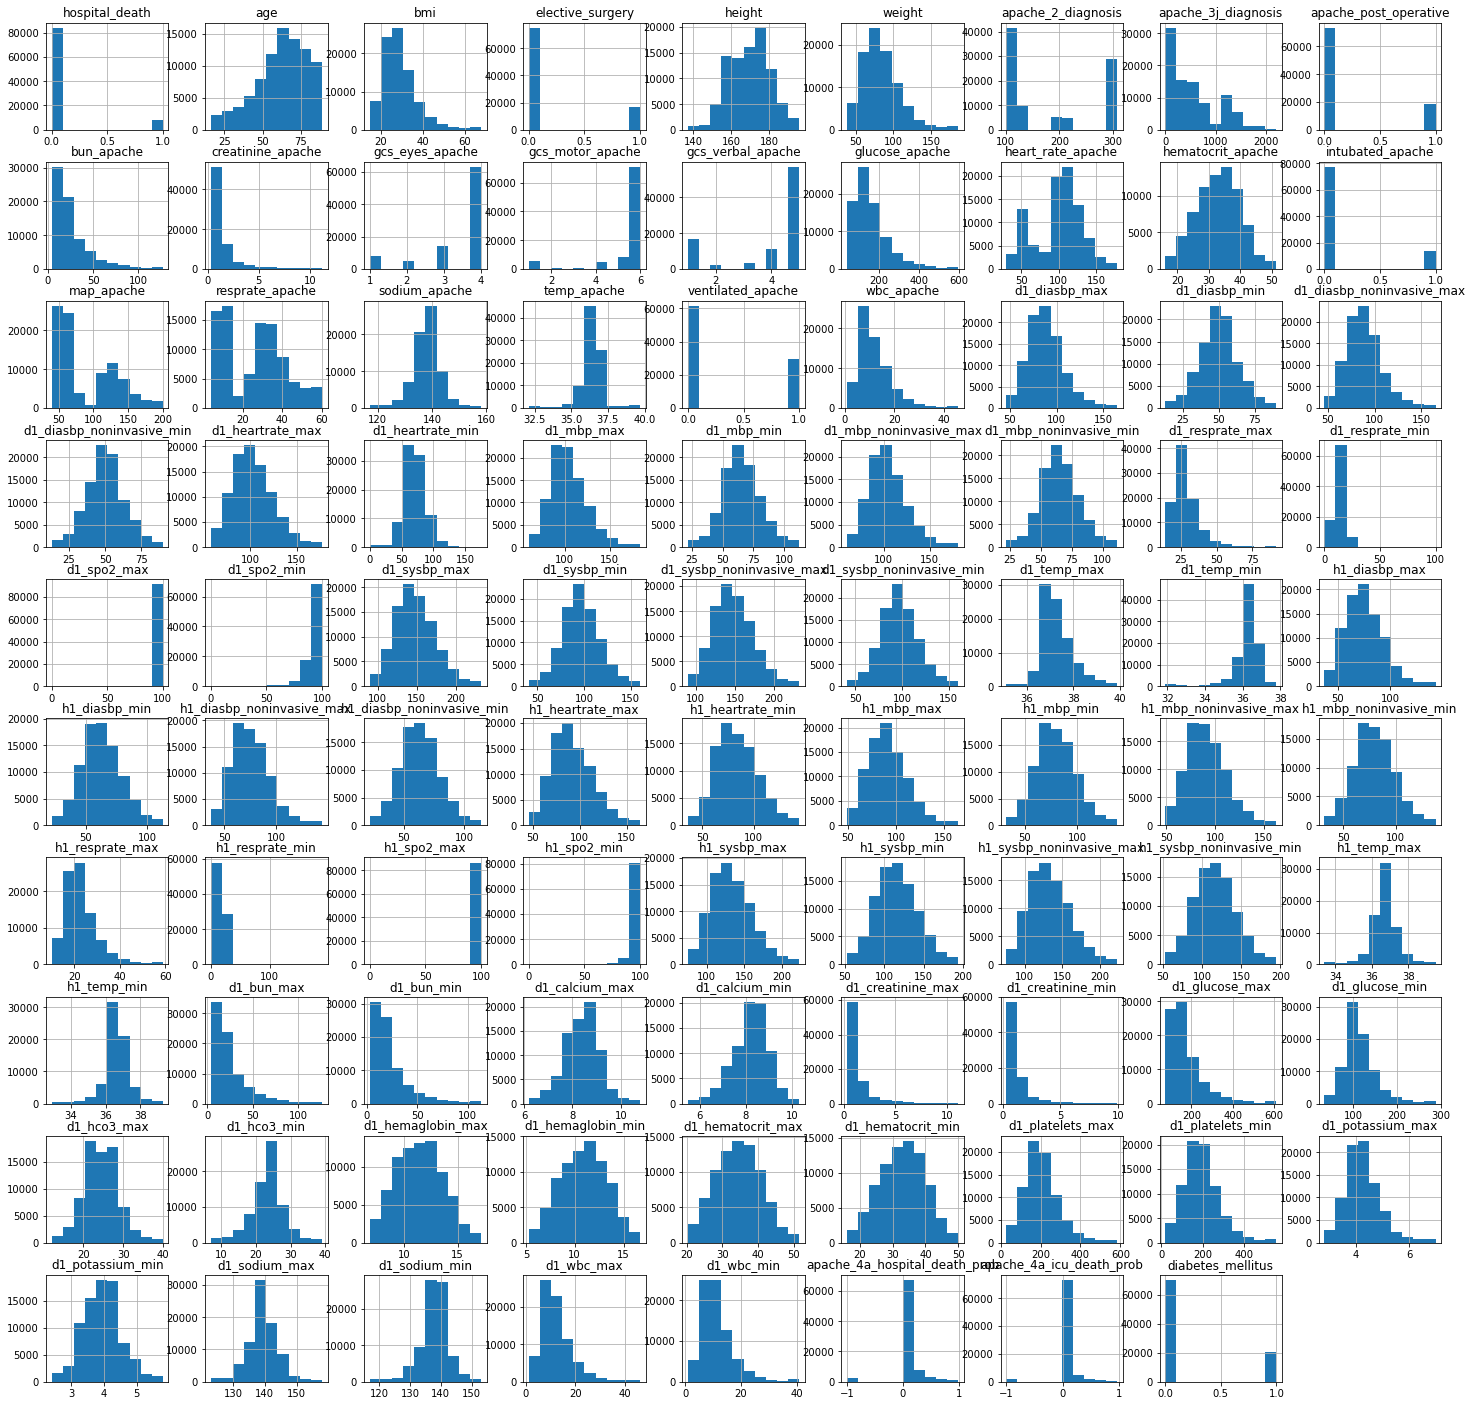

In [58]:
# histograms
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
df.hist(sharex=False, sharey=False,ax=ax)
plt.show()

In [59]:
df.head(10)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,...,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,admit,...,3.4,136.0,134.0,14.1,14.1,0.10,0.05,1.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,admit,...,3.8,145.0,145.0,23.3,12.7,0.47,0.29,1.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,admit,...,3.5,NaN,NaN,9.0,8.0,0.04,0.03,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,admit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Trauma,Trauma
5,0,67.0,27.56,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,admit,...,3.7,137.0,137.0,10.9,10.9,0.05,0.02,1.0,Neurological,Neurologic
6,0,59.0,57.45,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,admit,...,4.2,136.0,135.0,9.3,5.9,0.10,0.05,1.0,Respiratory,Respiratory
7,0,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,admit,...,2.4,140.0,140.0,12.8,12.8,0.11,0.06,0.0,Sepsis,Cardiovascular
8,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,admit,...,5.2,142.0,142.0,24.7,24.7,NaN,NaN,0.0,Cardiovascular,Cardiovascular
9,0,50.0,25.71,0,NaN,M,175.3,Direct Admit,Accident & Emergency,admit,...,3.3,139.0,139.0,12.8,12.8,0.02,0.01,0.0,Cardiovascular,Cardiovascular


In [61]:
corr = df["d1_potassium_min"].corr(df["hospital_death"])

In [62]:
print(corr)

0.02507985392726836


In [64]:
for col in df.columns:
    corr = df[col].corr(df["hospital_death"])
    print(col,corr)

hospital_death 0.9999999999999998
age 0.1110167381560926
bmi -0.031246935535041702
elective_surgery -0.09357360994758142


TypeError: unsupported operand type(s) for /: 'str' and 'int'

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (97).

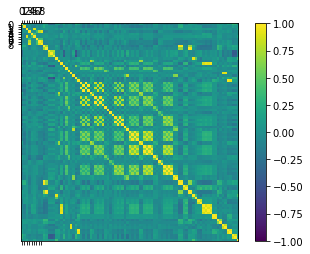

In [68]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

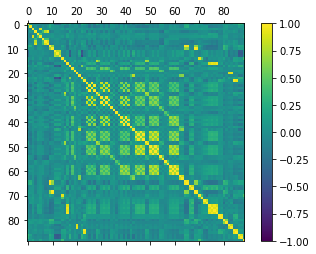

In [70]:
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [72]:
df.shape

(91713, 97)

In [73]:
df.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache',
       'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max',
       'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min',
       'h1_

In [82]:
df[:,"apache_2_diagnosis"]

TypeError: '(slice(None, None, None), 'apache_2_diagnosis')' is an invalid key

In [86]:
from numpy import unique
# summarize the number of unique values in each column
for col in df:
    print(col,len(df[col].unique()))

hospital_death 2
age 75
bmi 34889
elective_surgery 2
ethnicity 7
gender 3
height 402
hospital_admit_source 16
icu_admit_source 6
icu_stay_type 3
icu_type 8
weight 3410
apache_2_diagnosis 45
apache_3j_diagnosis 400
apache_post_operative 2
bun_apache 477
creatinine_apache 1128
gcs_eyes_apache 5
gcs_motor_apache 7
gcs_verbal_apache 6
glucose_apache 566
heart_rate_apache 150
hematocrit_apache 354
intubated_apache 3
map_apache 162
resprate_apache 75
sodium_apache 120
temp_apache 192
ventilated_apache 3
wbc_apache 3076
d1_diasbp_max 121
d1_diasbp_min 79
d1_diasbp_noninvasive_max 121
d1_diasbp_noninvasive_min 79
d1_heartrate_max 121
d1_heartrate_min 155
d1_mbp_max 126
d1_mbp_min 92
d1_mbp_noninvasive_max 123
d1_mbp_noninvasive_min 92
d1_resprate_max 80
d1_resprate_min 56
d1_spo2_max 44
d1_spo2_min 102
d1_sysbp_max 144
d1_sysbp_min 121
d1_sysbp_noninvasive_max 144
d1_sysbp_noninvasive_min 121
d1_temp_max 187
d1_temp_min 210
h1_diasbp_max 108
h1_diasbp_min 93
h1_diasbp_noninvasive_max 109
h1_di

In [87]:
print(df.nunique())

hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
hospital_admit_source               15
icu_admit_source                     5
icu_stay_type                        3
icu_type                             8
weight                            3409
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
bun_apache                         476
creatinine_apache                 1127
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_verbal_apache                    5
glucose_apache                     565
heart_rate_apache                  149
hematocrit_apache                  353
intubated_apache                     2
map_apache                         161
resprate_apache          

In [94]:
# summarize the number of unique values in each column
count = 0
for col in df:
    num = len(df[col].unique())
    percentage = float(num) / df.shape[0] * 100
    if percentage < 1:
        count += 1
        print('%s, %d, %.1f%%' % (col, num, percentage))
print(count)

hospital_death, 2, 0.0%
age, 75, 0.1%
elective_surgery, 2, 0.0%
ethnicity, 7, 0.0%
gender, 3, 0.0%
height, 402, 0.4%
hospital_admit_source, 16, 0.0%
icu_admit_source, 6, 0.0%
icu_stay_type, 3, 0.0%
icu_type, 8, 0.0%
apache_2_diagnosis, 45, 0.0%
apache_3j_diagnosis, 400, 0.4%
apache_post_operative, 2, 0.0%
bun_apache, 477, 0.5%
gcs_eyes_apache, 5, 0.0%
gcs_motor_apache, 7, 0.0%
gcs_verbal_apache, 6, 0.0%
glucose_apache, 566, 0.6%
heart_rate_apache, 150, 0.2%
hematocrit_apache, 354, 0.4%
intubated_apache, 3, 0.0%
map_apache, 162, 0.2%
resprate_apache, 75, 0.1%
sodium_apache, 120, 0.1%
temp_apache, 192, 0.2%
ventilated_apache, 3, 0.0%
d1_diasbp_max, 121, 0.1%
d1_diasbp_min, 79, 0.1%
d1_diasbp_noninvasive_max, 121, 0.1%
d1_diasbp_noninvasive_min, 79, 0.1%
d1_heartrate_max, 121, 0.1%
d1_heartrate_min, 155, 0.2%
d1_mbp_max, 126, 0.1%
d1_mbp_min, 92, 0.1%
d1_mbp_noninvasive_max, 123, 0.1%
d1_mbp_noninvasive_min, 92, 0.1%
d1_resprate_max, 80, 0.1%
d1_resprate_min, 56, 0.1%
d1_spo2_max, 44, 0.0

In [96]:
from numpy import mean
from numpy import std
print(mean(df),std(df))

hospital_death                     0.086
age                               62.310
bmi                               29.186
elective_surgery                   0.184
height                           169.642
weight                            84.028
apache_2_diagnosis               185.402
apache_3j_diagnosis              558.216
apache_post_operative              0.201
bun_apache                        25.825
creatinine_apache                  1.480
gcs_eyes_apache                    3.465
gcs_motor_apache                   5.471
gcs_verbal_apache                  3.995
glucose_apache                   160.327
heart_rate_apache                 99.708
hematocrit_apache                 32.989
intubated_apache                   0.151
map_apache                        88.016
resprate_apache                   25.811
sodium_apache                    137.966
temp_apache                       36.414
ventilated_apache                  0.326
wbc_apache                        12.133
d1_diasbp_max   

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [98]:
df["sodium_apache"].value_counts()

139.0    7543
138.0    7461
140.0    6948
137.0    6741
136.0    5766
141.0    5636
135.0    4481
142.0    4349
134.0    3660
143.0    2858
133.0    2536
132.0    1909
144.0    1823
131.0    1423
145.0    1106
130.0    1097
146.0     847
129.0     734
147.0     704
128.0     581
148.0     532
117.0     470
127.0     433
149.0     429
150.0     334
158.0     314
126.0     307
125.0     263
151.0     209
124.0     201
152.0     190
123.0     162
122.0     150
153.0     141
121.0     119
155.0     104
154.0      95
119.0      87
120.0      83
156.0      62
118.0      62
157.0      58
137.4       3
138.4       3
139.8       3
134.9       3
136.9       3
136.3       2
130.4       2
138.1       2
139.7       2
138.5       2
135.8       2
132.7       2
140.4       2
137.8       2
140.2       2
133.9       2
139.2       2
134.1       2
131.6       2
136.4       2
142.1       2
135.1       2
139.9       2
120.4       1
136.8       1
136.1       1
130.9       1
129.6       1
137.3       1
142.7 

In [102]:
(df[df.columns]==0).sum()

hospital_death                   83798
age                                  0
bmi                                  0
elective_surgery                 74862
ethnicity                            0
gender                               0
height                               0
hospital_admit_source                0
icu_admit_source                     0
icu_stay_type                        0
icu_type                             0
weight                               0
apache_2_diagnosis                   0
apache_3j_diagnosis                  0
apache_post_operative            73269
bun_apache                           0
creatinine_apache                    0
gcs_eyes_apache                      0
gcs_motor_apache                     0
gcs_verbal_apache                    0
glucose_apache                       0
heart_rate_apache                    0
hematocrit_apache                    0
intubated_apache                 77237
map_apache                           0
resprate_apache          

In [101]:
df.drop('diabetes_mellitus',axis=1,inplace=True)

In [103]:
df.drop(['elective_surgery','apache_post_operative','intubated_apache','ventilated_apache'],axis=1,inplace=True)

In [104]:
df.head(0)

,hospital_death,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,...,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_3j_bodysystem,apache_2_bodysystem


In [105]:
df.isnull().sum()

hospital_death                       0
age                               4228
bmi                               3429
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_stay_type                        0
icu_type                             0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_verbal_apache                 1901
glucose_apache                   11036
heart_rate_apache                  878
hematocrit_apache                19878
map_apache                         994
resprate_apache                   1234
sodium_apache                    18600
temp_apache                       4108
wbc_apache               

In [113]:
# summarize the number of rows with missing values for each column
for i in df.columns:
    # count number of rows with missing values
    n_miss = df[i].isnull().sum()
    perc = n_miss / df[i].shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> hospital_death, Missing: 0 (0.0%)
> age, Missing: 4228 (4.6%)
> bmi, Missing: 3429 (3.7%)
> ethnicity, Missing: 1395 (1.5%)
> gender, Missing: 25 (0.0%)
> height, Missing: 1334 (1.5%)
> hospital_admit_source, Missing: 21409 (23.3%)
> icu_admit_source, Missing: 112 (0.1%)
> icu_stay_type, Missing: 0 (0.0%)
> icu_type, Missing: 0 (0.0%)
> weight, Missing: 2720 (3.0%)
> apache_2_diagnosis, Missing: 1662 (1.8%)
> apache_3j_diagnosis, Missing: 1101 (1.2%)
> bun_apache, Missing: 19262 (21.0%)
> creatinine_apache, Missing: 18853 (20.6%)
> gcs_eyes_apache, Missing: 1901 (2.1%)
> gcs_motor_apache, Missing: 1901 (2.1%)
> gcs_verbal_apache, Missing: 1901 (2.1%)
> glucose_apache, Missing: 11036 (12.0%)
> heart_rate_apache, Missing: 878 (1.0%)
> hematocrit_apache, Missing: 19878 (21.7%)
> map_apache, Missing: 994 (1.1%)
> resprate_apache, Missing: 1234 (1.3%)
> sodium_apache, Missing: 18600 (20.3%)
> temp_apache, Missing: 4108 (4.5%)
> wbc_apache, Missing: 22012 (24.0%)
> d1_diasbp_max, Missing: 

In [114]:
X = df.drop('hospital_death',axis=1)
y = df['hospital_death']

In [123]:
df.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_stay_type                     object
icu_type                          object
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
bun_apache                       float64
creatinine_apache                float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_verbal_apache                float64
glucose_apache                   float64
heart_rate_apache                float64
hematocrit_apache                float64
map_apache                       float64
resprate_apache                  float64
sodium_apache                    float64
temp_apache     

In [124]:
strcols = []
# These columns contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        strcols.append(label)
strcols

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [122]:
from sklearn.preprocessing import LabelEncoder
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
         df[label+"_encoded"] = LabelEncoder().fit_transform(df[label])


In [128]:
df.drop(strcols,axis=1,inplace=True)

KeyError: "['ethnicity' 'gender' 'hospital_admit_source' 'icu_admit_source'\n 'icu_stay_type' 'icu_type' 'apache_3j_bodysystem' 'apache_2_bodysystem'] not found in axis"

In [145]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [157]:
(df < 0).values.any()

True

In [158]:
df[df < 0] = 0

In [159]:
X = df.drop('hospital_death',axis=1)
y = df['hospital_death']

In [160]:
from numpy import isnan
from sklearn.impute import SimpleImputer

# define imputer
imputer = SimpleImputer(strategy='median')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [161]:
from sklearn.preprocessing import OrdinalEncoder
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [162]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.33, random_state=1)
# prepare input data
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train.shape, y_train_enc.shape)
print('Test', X_test.shape, y_test_enc.shape)

Train (61447, 91) (61447,)
Test (30266, 91) (30266,)


In [169]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [170]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 708.839070
Feature 1: 69.411106
Feature 2: 12.477586
Feature 3: 89.386756
Feature 4: 453.206970
Feature 5: 514.994535
Feature 6: 1719.930826
Feature 7: 637.054583
Feature 8: 4173.883335
Feature 9: 5036.454118
Feature 10: 3510.098891
Feature 11: 263.225114
Feature 12: 674.866210
Feature 13: 182.059120
Feature 14: 101.439429
Feature 15: 449.269507
Feature 16: 21.507107
Feature 17: 1392.256710
Feature 18: 869.834707
Feature 19: 0.049125
Feature 20: 2029.663155
Feature 21: 0.108473
Feature 22: 2015.984355
Feature 23: 1605.046482
Feature 24: 4.726405
Feature 25: 21.323695
Feature 26: 2427.082886
Feature 27: 20.217705
Feature 28: 2391.590439
Feature 29: 711.789460
Feature 30: 27.406262
Feature 31: 5.708283
Feature 32: 2896.067289
Feature 33: 51.325261
Feature 34: 2785.198273
Feature 35: 49.037535
Feature 36: 2742.350355
Feature 37: 0.109642
Feature 38: 2646.954928
Feature 39: 57.062525
Feature 40: 874.658712
Feature 41: 70.175384
Feature 42: 953.741801
Feature 43: 731.540551
Featu

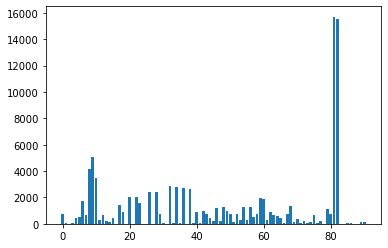

In [171]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [176]:
ind = 0
for i in X.columns:
    print (ind,i)
    ind += 1

0 age
1 bmi
2 height
3 weight
4 apache_2_diagnosis
5 apache_3j_diagnosis
6 bun_apache
7 creatinine_apache
8 gcs_eyes_apache
9 gcs_motor_apache
10 gcs_verbal_apache
11 glucose_apache
12 heart_rate_apache
13 hematocrit_apache
14 map_apache
15 resprate_apache
16 sodium_apache
17 temp_apache
18 wbc_apache
19 d1_diasbp_max
20 d1_diasbp_min
21 d1_diasbp_noninvasive_max
22 d1_diasbp_noninvasive_min
23 d1_heartrate_max
24 d1_heartrate_min
25 d1_mbp_max
26 d1_mbp_min
27 d1_mbp_noninvasive_max
28 d1_mbp_noninvasive_min
29 d1_resprate_max
30 d1_resprate_min
31 d1_spo2_max
32 d1_spo2_min
33 d1_sysbp_max
34 d1_sysbp_min
35 d1_sysbp_noninvasive_max
36 d1_sysbp_noninvasive_min
37 d1_temp_max
38 d1_temp_min
39 h1_diasbp_max
40 h1_diasbp_min
41 h1_diasbp_noninvasive_max
42 h1_diasbp_noninvasive_min
43 h1_heartrate_max
44 h1_heartrate_min
45 h1_mbp_max
46 h1_mbp_min
47 h1_mbp_noninvasive_max
48 h1_mbp_noninvasive_min
49 h1_resprate_max
50 h1_resprate_min
51 h1_spo2_max
52 h1_spo2_min
53 h1_sysbp_max
54 

In [177]:
fs.scores_

array([7.08839070e+02, 6.94111061e+01, 1.24775858e+01, 8.93867560e+01,
       4.53206970e+02, 5.14994535e+02, 1.71993083e+03, 6.37054583e+02,
       4.17388333e+03, 5.03645412e+03, 3.51009889e+03, 2.63225114e+02,
       6.74866210e+02, 1.82059120e+02, 1.01439429e+02, 4.49269507e+02,
       2.15071072e+01, 1.39225671e+03, 8.69834707e+02, 4.91246851e-02,
       2.02966315e+03, 1.08473042e-01, 2.01598436e+03, 1.60504648e+03,
       4.72640480e+00, 2.13236947e+01, 2.42708289e+03, 2.02177051e+01,
       2.39159044e+03, 7.11789460e+02, 2.74062623e+01, 5.70828257e+00,
       2.89606729e+03, 5.13252609e+01, 2.78519827e+03, 4.90375346e+01,
       2.74235035e+03, 1.09642027e-01, 2.64695493e+03, 5.70625248e+01,
       8.74658712e+02, 7.01753844e+01, 9.53741801e+02, 7.31540551e+02,
       4.30994563e+02, 2.30207330e+02, 1.16363245e+03, 2.38710738e+02,
       1.23825195e+03, 9.34401890e+02, 7.44998160e+02, 1.26153520e+02,
       7.48723055e+02, 3.04335626e+02, 1.28728318e+03, 2.85029047e+02,
      

In [193]:
tmp = list(fs.scores_)

In [194]:
tmp.sort()

In [195]:
tmp

[0.049124685127965965,
 0.10847304241292673,
 0.10964202713799616,
 0.17186153584630198,
 1.0559796829048396,
 1.8375862815969568,
 4.726404795006455,
 5.708282569702423,
 12.477585757785606,
 14.551636597159055,
 16.06623595997306,
 20.21770505774544,
 21.323694662627478,
 21.50710721502314,
 27.406262297660497,
 29.743370240606716,
 33.90680260911797,
 35.68876021288144,
 40.49118975710975,
 49.037534585250775,
 51.325260922477376,
 57.06252476723938,
 60.05132726553706,
 60.553541427730714,
 69.41110613640998,
 70.17538444492249,
 89.38675604742762,
 101.43942915616941,
 126.15351954597838,
 127.25589389436313,
 142.7148281676196,
 152.12446579914237,
 160.62812197856442,
 182.05911992219973,
 199.4977577574795,
 230.20732989595396,
 238.71073776490886,
 243.36697759475922,
 263.2251142016327,
 285.02904714012175,
 304.33562643936483,
 305.763488712039,
 369.81735902381195,
 404.9898960988815,
 430.99456295801457,
 449.2695071456451,
 453.20697004774553,
 514.9945350766353,
 549.856

In [196]:
for i in range(len(tmp)):
    print('Feature %d: %f' % (i, tmp[i]))

Feature 0: 0.049125
Feature 1: 0.108473
Feature 2: 0.109642
Feature 3: 0.171862
Feature 4: 1.055980
Feature 5: 1.837586
Feature 6: 4.726405
Feature 7: 5.708283
Feature 8: 12.477586
Feature 9: 14.551637
Feature 10: 16.066236
Feature 11: 20.217705
Feature 12: 21.323695
Feature 13: 21.507107
Feature 14: 27.406262
Feature 15: 29.743370
Feature 16: 33.906803
Feature 17: 35.688760
Feature 18: 40.491190
Feature 19: 49.037535
Feature 20: 51.325261
Feature 21: 57.062525
Feature 22: 60.051327
Feature 23: 60.553541
Feature 24: 69.411106
Feature 25: 70.175384
Feature 26: 89.386756
Feature 27: 101.439429
Feature 28: 126.153520
Feature 29: 127.255894
Feature 30: 142.714828
Feature 31: 152.124466
Feature 32: 160.628122
Feature 33: 182.059120
Feature 34: 199.497758
Feature 35: 230.207330
Feature 36: 238.710738
Feature 37: 243.366978
Feature 38: 263.225114
Feature 39: 285.029047
Feature 40: 304.335626
Feature 41: 305.763489
Feature 42: 369.817359
Feature 43: 404.989896
Feature 44: 430.994563
Feature 45

In [197]:
df.drop(['d1_diasbp_max','d1_diasbp_noninvasive_max','d1_heartrate_min','d1_spo2_max','d1_temp_max','d1_sodium_min','ethnicity_encoded'],axis=1,inplace=True)

In [198]:
df.head(10)

,hospital_death,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,gcs_eyes_apache,...,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,gender_encoded,hospital_admit_source_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
0,0,68.0,22.73,180.3,73.9,113.0,502.01,31.0,2.51,3.0,...,14.1,0.10,0.05,1,4,1,0,2,9,0
1,0,77.0,27.42,160.0,70.2,108.0,203.01,9.0,0.56,1.0,...,12.7,0.47,0.29,0,4,1,0,5,8,6
2,0,25.0,31.95,172.7,95.3,122.0,703.03,NaN,NaN,3.0,...,NaN,0.00,0.00,0,3,0,0,5,5,3
3,0,81.0,22.64,165.1,61.7,203.0,1206.03,NaN,NaN,4.0,...,8.0,0.04,0.03,0,8,2,0,2,0,0
4,0,19.0,NaN,188.0,NaN,119.0,601.01,NaN,NaN,NaN,...,NaN,NaN,NaN,1,15,0,0,5,10,7
5,0,67.0,27.56,190.5,100.0,301.0,403.01,13.0,0.71,4.0,...,10.9,0.05,0.02,1,2,0,0,5,7,4
6,0,59.0,57.45,165.1,156.6,108.0,203.01,18.0,0.78,4.0,...,5.9,0.10,0.05,0,8,0,0,5,8,6
7,0,70.0,NaN,165.0,NaN,113.0,501.05,48.0,2.05,4.0,...,12.8,0.11,0.06,1,3,0,0,5,9,0
8,1,45.0,NaN,170.2,NaN,116.0,103.01,15.0,1.16,4.0,...,24.7,NaN,NaN,1,10,3,0,0,0,0
9,0,50.0,25.71,175.3,79.0,112.0,107.01,10.0,0.83,4.0,...,12.8,0.02,0.01,1,2,0,0,0,0,0


In [201]:
X = df.drop('hospital_death',axis=1)
y = df['hospital_death']

In [202]:
# define imputer
imputer = SimpleImputer(strategy='median')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [203]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.33, random_state=1)
# prepare input data
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train.shape, y_train_enc.shape)
print('Test', X_test.shape, y_test_enc.shape)

Train (61447, 84) (61447,)
Test (30266, 84) (30266,)


In [204]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

In [205]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=84, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [206]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train_fs, y_train_enc, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train_fs, y_train_enc)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
6145/6145 [==============================] - 4s 616us/step - loss: 0.4440 - accuracy: 0.9034
Epoch 2/150
6145/6145 [==============================] - 4s 615us/step - loss: 0.2442 - accuracy: 0.9160
Epoch 3/150
6145/6145 [==============================] - 4s 611us/step - loss: 0.2358 - accuracy: 0.9160
Epoch 4/150
6145/6145 [==============================] - 4s 611us/step - loss: 0.2269 - accuracy: 0.9164
Epoch 5/150
6145/6145 [==============================] - 4s 623us/step - loss: 0.2232 - accuracy: 0.9195
Epoch 6/150
6145/6145 [==============================] - 4s 609us/step - loss: 0.2214 - accuracy: 0.9197
Epoch 7/150
6145/6145 [==============================] - 4s 680us/step - loss: 0.2195 - accuracy: 0.9205
Epoch 8/150
6145/6145 [==============================] - 4s 698us/step - loss: 0.2191 - accuracy: 0.9207
Epoch 9/150
6145/6145 [==============================] - 4s 692us/step - loss: 0.2183 - accuracy: 0.9205
Epoch 10/150
6145/6145 [==============================]

6145/6145 [==============================] - 4s 687us/step - loss: 0.2103 - accuracy: 0.9230
Epoch 79/150
6145/6145 [==============================] - 4s 688us/step - loss: 0.2101 - accuracy: 0.9233
Epoch 80/150
6145/6145 [==============================] - 4s 693us/step - loss: 0.2102 - accuracy: 0.9231
Epoch 81/150
6145/6145 [==============================] - 4s 696us/step - loss: 0.2101 - accuracy: 0.9238
Epoch 82/150
6145/6145 [==============================] - 4s 705us/step - loss: 0.2104 - accuracy: 0.9234
Epoch 83/150
6145/6145 [==============================] - 4s 691us/step - loss: 0.2101 - accuracy: 0.9237
Epoch 84/150
6145/6145 [==============================] - 4s 697us/step - loss: 0.2099 - accuracy: 0.9236
Epoch 85/150
6145/6145 [==============================] - 4s 700us/step - loss: 0.2101 - accuracy: 0.9236
Epoch 86/150
6145/6145 [==============================] - 4s 693us/step - loss: 0.2101 - accuracy: 0.9234
Epoch 87/150
6145/6145 [==============================] - 4

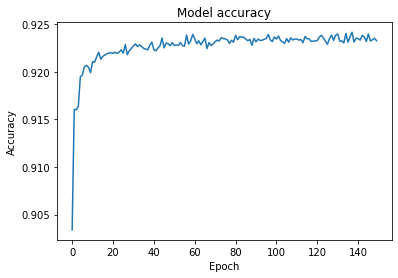

In [207]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

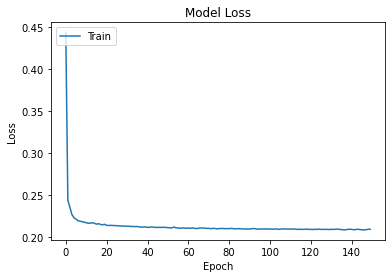

In [208]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [209]:
#saving the model
model.save('keras_model.h5')

In [210]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')

In [214]:
X_train[0]

array([6.50000000e+01, 3.09777778e+01, 1.50000000e+02, 6.97000000e+01,
       1.22000000e+02, 2.50000000e-01, 1.90000000e+01, 9.80000000e-01,
       4.00000000e+00, 6.00000000e+00, 5.00000000e+00, 1.33000000e+02,
       1.05000000e+02, 3.32000000e+01, 5.30000000e+01, 3.30000000e+01,
       1.38000000e+02, 3.64000000e+01, 1.04000000e+01, 4.10000000e+01,
       4.10000000e+01, 1.03000000e+02, 1.03000000e+02, 5.30000000e+01,
       1.03000000e+02, 5.30000000e+01, 3.30000000e+01, 1.30000000e+01,
       9.10000000e+01, 1.66000000e+02, 9.30000000e+01, 1.66000000e+02,
       9.30000000e+01, 3.64000000e+01, 8.20000000e+01, 6.40000000e+01,
       8.20000000e+01, 6.40000000e+01, 7.80000000e+01, 7.70000000e+01,
       1.03000000e+02, 7.70000000e+01, 1.03000000e+02, 7.70000000e+01,
       1.70000000e+01, 1.60000000e+01, 9.80000000e+01, 9.70000000e+01,
       1.66000000e+02, 1.23000000e+02, 1.66000000e+02, 1.23000000e+02,
       3.64000000e+01, 3.64000000e+01, 1.90000000e+01, 1.80000000e+01,
      

In [213]:
y_train_enc

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [215]:
result = np.where(y_train_enc == 1)

In [216]:
result

(array([   10,    17,    48, ..., 61424, 61433, 61445], dtype=int64),)

In [219]:
X_train[10]

array([ 81.        ,  27.65465458, 170.1       ,  80.3       ,
       121.        , 401.01      ,  20.        ,   0.8       ,
         1.        ,   1.        ,   1.        , 215.        ,
       106.        ,  36.        ,  41.        ,   8.        ,
       157.        ,  35.8       ,  10.06      ,  38.        ,
        38.        , 103.        , 130.        ,  41.        ,
       130.        ,  41.        ,  24.        ,  12.        ,
        92.        , 232.        ,  61.        , 232.        ,
        61.        ,  35.8       , 120.        ,  38.        ,
       120.        ,  38.        ,  86.        ,  57.        ,
       130.        ,  41.        , 130.        ,  41.        ,
        16.        ,  15.        ,  99.        ,  92.        ,
       223.        ,  61.        , 223.        ,  61.        ,
        36.8       ,  36.8       ,  20.        ,  16.        ,
         9.2       ,   8.9       ,   1.1       ,   0.8       ,
       215.        ,  94.        ,  31.1       ,  23.  

In [222]:
X_train[0]

array([6.50000000e+01, 3.09777778e+01, 1.50000000e+02, 6.97000000e+01,
       1.22000000e+02, 2.50000000e-01, 1.90000000e+01, 9.80000000e-01,
       4.00000000e+00, 6.00000000e+00, 5.00000000e+00, 1.33000000e+02,
       1.05000000e+02, 3.32000000e+01, 5.30000000e+01, 3.30000000e+01,
       1.38000000e+02, 3.64000000e+01, 1.04000000e+01, 4.10000000e+01,
       4.10000000e+01, 1.03000000e+02, 1.03000000e+02, 5.30000000e+01,
       1.03000000e+02, 5.30000000e+01, 3.30000000e+01, 1.30000000e+01,
       9.10000000e+01, 1.66000000e+02, 9.30000000e+01, 1.66000000e+02,
       9.30000000e+01, 3.64000000e+01, 8.20000000e+01, 6.40000000e+01,
       8.20000000e+01, 6.40000000e+01, 7.80000000e+01, 7.70000000e+01,
       1.03000000e+02, 7.70000000e+01, 1.03000000e+02, 7.70000000e+01,
       1.70000000e+01, 1.60000000e+01, 9.80000000e+01, 9.70000000e+01,
       1.66000000e+02, 1.23000000e+02, 1.66000000e+02, 1.23000000e+02,
       3.64000000e+01, 3.64000000e+01, 1.90000000e+01, 1.80000000e+01,
      

In [225]:
result = model.predict(X_train[[0]])
result

array([[0.0437111]], dtype=float32)

In [226]:
result = model.predict(X_train[[10]])
result

array([[0.6024188]], dtype=float32)

# Explainable AI

In [227]:
import shap

In [228]:
shap.initjs()

In [230]:
X_sample_enc = X_train[0:5,:]
X_sample_enc

array([[6.50000000e+01, 3.09777778e+01, 1.50000000e+02, 6.97000000e+01,
        1.22000000e+02, 2.50000000e-01, 1.90000000e+01, 9.80000000e-01,
        4.00000000e+00, 6.00000000e+00, 5.00000000e+00, 1.33000000e+02,
        1.05000000e+02, 3.32000000e+01, 5.30000000e+01, 3.30000000e+01,
        1.38000000e+02, 3.64000000e+01, 1.04000000e+01, 4.10000000e+01,
        4.10000000e+01, 1.03000000e+02, 1.03000000e+02, 5.30000000e+01,
        1.03000000e+02, 5.30000000e+01, 3.30000000e+01, 1.30000000e+01,
        9.10000000e+01, 1.66000000e+02, 9.30000000e+01, 1.66000000e+02,
        9.30000000e+01, 3.64000000e+01, 8.20000000e+01, 6.40000000e+01,
        8.20000000e+01, 6.40000000e+01, 7.80000000e+01, 7.70000000e+01,
        1.03000000e+02, 7.70000000e+01, 1.03000000e+02, 7.70000000e+01,
        1.70000000e+01, 1.60000000e+01, 9.80000000e+01, 9.70000000e+01,
        1.66000000e+02, 1.23000000e+02, 1.66000000e+02, 1.23000000e+02,
        3.64000000e+01, 3.64000000e+01, 1.90000000e+01, 1.800000

In [234]:
def f(X):
    return model.predict([X[:,i] for i in range(X.shape[1])]).flatten()

In [235]:
explainer = shap.KernelExplainer(f, X.iloc[:50,:])
shap_values = explainer.shap_values(X.iloc[299,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_display.iloc[299,:])

Provided model function fails when applied to the provided data set.


ValueError: in user code:

    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential" expects 1 input(s), but it received 84 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None,) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None,) dtype=float32>]


In [236]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

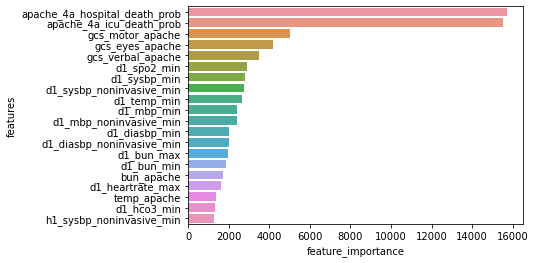

In [239]:
plot_features(X.columns, fs.scores_)

In [240]:
X.columns

Index(['age', 'bmi', 'height', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache',
       'sodium_apache', 'temp_apache', 'wbc_apache', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max',
       'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_mi

 As per the feature selection process executed the following are the prominent features that impacts the decision. We will pick the top ten

'apache_4a_hospital_death_prob','apache_4a_icu_death_prob','gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache','d1_spo2_min','d1_sysbp_min','d1_diasbp_noninvasive_min','d1_temp_min','d1_mbp_min'

# Light Weight Model for Deployment

In [241]:
key_features = ['apache_4a_hospital_death_prob','apache_4a_icu_death_prob','gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache','d1_spo2_min','d1_sysbp_min','d1_diasbp_noninvasive_min','d1_temp_min','d1_mbp_min']
df_lite = df[key_features]

In [242]:
df_lite

,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,d1_spo2_min,d1_sysbp_min,d1_diasbp_noninvasive_min,d1_temp_min,d1_mbp_min
0,0.10,0.05,6.0,3.0,4.0,74.0,73.0,37.0,37.2,46.0
1,0.47,0.29,3.0,1.0,1.0,70.0,67.0,31.0,35.1,38.0
2,0.00,0.00,6.0,3.0,5.0,91.0,105.0,48.0,36.7,68.0
3,0.04,0.03,6.0,4.0,5.0,95.0,84.0,42.0,34.8,84.0
4,NaN,NaN,NaN,NaN,NaN,96.0,120.0,57.0,36.7,90.0
...,...,...,...,...,...,...,...,...,...,...
91708,0.12,0.05,6.0,4.0,5.0,85.0,67.0,44.0,36.6,48.0
91709,0.03,0.02,6.0,4.0,5.0,45.0,65.0,40.0,36.1,47.0
91710,0.05,0.02,6.0,3.0,4.0,81.0,75.0,49.0,35.8,57.0
91711,0.07,0.02,5.0,4.0,4.0,83.0,111.0,32.0,36.3,54.0


In [243]:
X = df_lite
y = df['hospital_death']

In [244]:
# define imputer
imputer = SimpleImputer(strategy='median')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [245]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.33, random_state=1)
# prepare input data
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train.shape, y_train_enc.shape)
print('Test', X_test.shape, y_test_enc.shape)

Train (61447, 10) (61447,)
Test (30266, 10) (30266,)


In [246]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

In [247]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [248]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train_fs, y_train_enc, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train_fs, y_train_enc)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
6145/6145 [==============================] - 4s 588us/step - loss: 0.2758 - accuracy: 0.9155
Epoch 2/150
6145/6145 [==============================] - 4s 578us/step - loss: 0.2310 - accuracy: 0.9223
Epoch 3/150
6145/6145 [==============================] - 4s 574us/step - loss: 0.2278 - accuracy: 0.9227
Epoch 4/150
6145/6145 [==============================] - 4s 574us/step - loss: 0.2258 - accuracy: 0.9224
Epoch 5/150
6145/6145 [==============================] - 4s 580us/step - loss: 0.2253 - accuracy: 0.9229
Epoch 6/150
6145/6145 [==============================] - 4s 574us/step - loss: 0.2234 - accuracy: 0.9234
Epoch 7/150
6145/6145 [==============================] - 3s 563us/step - loss: 0.2231 - accuracy: 0.9225
Epoch 8/150
6145/6145 [==============================] - 3s 566us/step - loss: 0.2222 - accuracy: 0.9234
Epoch 9/150
6145/6145 [==============================] - 4s 605us/step - loss: 0.2218 - accuracy: 0.9237
Epoch 10/150
6145/6145 [==============================]

6145/6145 [==============================] - 4s 617us/step - loss: 0.2146 - accuracy: 0.9238
Epoch 79/150
6145/6145 [==============================] - 4s 619us/step - loss: 0.2142 - accuracy: 0.9242
Epoch 80/150
6145/6145 [==============================] - 4s 615us/step - loss: 0.2142 - accuracy: 0.9237
Epoch 81/150
6145/6145 [==============================] - 4s 617us/step - loss: 0.2139 - accuracy: 0.9242
Epoch 82/150
6145/6145 [==============================] - 4s 613us/step - loss: 0.2141 - accuracy: 0.9243
Epoch 83/150
6145/6145 [==============================] - 4s 632us/step - loss: 0.2139 - accuracy: 0.9244
Epoch 84/150
6145/6145 [==============================] - 4s 624us/step - loss: 0.2142 - accuracy: 0.9242
Epoch 85/150
6145/6145 [==============================] - 4s 620us/step - loss: 0.2139 - accuracy: 0.9242
Epoch 86/150
6145/6145 [==============================] - 4s 622us/step - loss: 0.2140 - accuracy: 0.9238
Epoch 87/150
6145/6145 [==============================] - 4

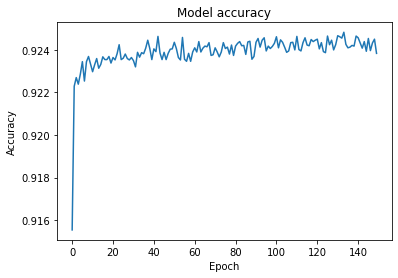

In [249]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

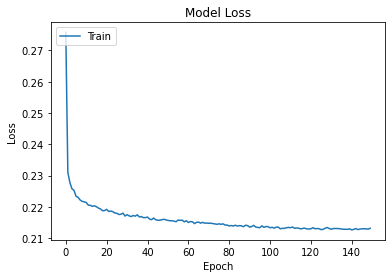

In [250]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [251]:
#saving the model
model.save('Patient_Survival_NN_Model.h5')

In [252]:
#loading the model 
from keras.models import load_model
model = load_model('Patient_Survival_NN_Model.h5')

# Testing the model

In [253]:
def get_prediction(data,model):
    """
    Predict the class of a given data point.
    """
    return model.predict(data)

In [262]:
df_test = df.iloc[8]

In [263]:
df_test

hospital_death                     1.00
age                               45.00
bmi                                 NaN
height                           170.20
weight                              NaN
apache_2_diagnosis               116.00
apache_3j_diagnosis              103.01
bun_apache                        15.00
creatinine_apache                  1.16
gcs_eyes_apache                    4.00
gcs_motor_apache                   6.00
gcs_verbal_apache                  5.00
glucose_apache                   380.00
heart_rate_apache                 82.00
hematocrit_apache                 37.90
map_apache                        66.00
resprate_apache                   14.00
sodium_apache                    142.00
temp_apache                       36.90
wbc_apache                        24.70
d1_diasbp_min                     59.00
d1_diasbp_noninvasive_min         59.00
d1_heartrate_max                  82.00
d1_mbp_max                        93.00
d1_mbp_min                        71.00


In [261]:
df.loc[df['hospital_death'] == 1]

,hospital_death,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,gcs_eyes_apache,...,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,gender_encoded,hospital_admit_source_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
8,1,45.0,NaN,170.2,NaN,116.0,103.01,15.0,1.16,4.0,...,24.70,NaN,NaN,1,10,3,0,0,0,0
25,1,68.0,26.011,165.1,70.9,113.0,501.06,73.0,2.14,4.0,...,10.00,0.60,0.51,0,15,1,0,0,9,0
46,1,64.0,16.980,180.3,55.2,217.0,1502.02,18.0,0.77,1.0,...,21.80,0.57,0.34,1,8,2,0,6,7,4
58,1,55.0,NaN,172.7,NaN,105.0,207.01,15.0,1.21,4.0,...,21.80,0.04,0.02,0,3,0,0,5,8,6
73,1,74.0,25.312,167.6,71.1,306.0,802.04,95.0,2.80,4.0,...,0.90,0.66,0.34,1,2,0,0,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91602,1,19.0,20.308,177.8,64.2,110.0,104.01,47.0,1.20,4.0,...,15.72,0.03,0.02,1,15,3,0,3,0,0
91611,1,74.0,32.622,170.2,94.5,114.0,102.01,39.0,3.40,2.0,...,9.66,0.60,0.36,1,4,1,0,3,0,0
91620,1,NaN,21.068,162.6,55.7,113.0,501.05,21.0,0.90,4.0,...,14.42,0.33,0.15,1,4,1,0,5,9,0
91691,1,59.0,29.385,165.0,80.0,114.0,102.01,NaN,NaN,1.0,...,11.50,0.47,0.32,0,3,0,0,5,0,0


In [273]:
df_copy.iloc[0]

encounter_id                              66154
patient_id                                25312
hospital_id                                 118
hospital_death                                0
age                                        68.0
bmi                                       22.73
elective_surgery                              0
ethnicity                             Caucasian
gender                                        M
height                                    180.3
hospital_admit_source                     Floor
icu_admit_source                          Floor
icu_id                                       92
icu_stay_type                             admit
icu_type                                  CTICU
pre_icu_los_days                          0.542
readmission_status                            0
weight                                     73.9
albumin_apache                              2.3
apache_2_diagnosis                        113.0
apache_3j_diagnosis                     

In [274]:
df_copy.iloc[10]

encounter_id                                        105427
patient_id                                          125898
hospital_id                                             77
hospital_death                                           0
age                                                   72.0
bmi                                                 28.257
elective_surgery                                         1
ethnicity                                         Hispanic
gender                                                   F
height                                               154.9
hospital_admit_source                       Operating Room
icu_admit_source                 Operating Room / Recovery
icu_id                                                 113
icu_stay_type                                        admit
icu_type                                      Med-Surg ICU
pre_icu_los_days                                     0.005
readmission_status                                      

In [297]:
result = np.where(y_train_enc == 1)
result

(array([   10,    17,    48, ..., 61424, 61433, 61445], dtype=int64),)

In [308]:
df_test = df_copy[0:1][key_features]

In [310]:
df_test = df_copy[25:26][key_features]

In [300]:
df_test = df_copy[25:26]['hospital_death']

In [311]:
df_test

,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,d1_spo2_min,d1_sysbp_min,d1_diasbp_noninvasive_min,d1_temp_min,d1_mbp_min
25,0.6,0.51,6.0,4.0,3.0,51.0,74.0,36.0,36.2,47.0


In [306]:
data = np.array([0.10,0.05,6.0,3.0,4.0,74.0,73.0,37.0,37.2,46.0]).reshape(1,-1)

In [312]:
data = np.array([0.6,0.51,6.0,4.0,3.0,51.0,74.0,36.0,36.2,47.0]).reshape(1,-1)

In [313]:
#data = np.array([energy_star_rating,facility_type,floor_area,year_built,State_Factor,building_class,ELEVATION]).reshape(1,-1)

pred = get_prediction(data,model)
pred

array([[0.7058542]], dtype=float32)

In [315]:
key_features

['apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_verbal_apache',
 'd1_spo2_min',
 'd1_sysbp_min',
 'd1_diasbp_noninvasive_min',
 'd1_temp_min',
 'd1_mbp_min']